In [1]:
# Make sure to install graphframes: pip install graphframes
from pyspark.sql import SparkSession
from graphframes import GraphFrame
spark = SparkSession.builder \
    .appName("GraphFrames Example") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.1-s_2.12") \
    .getOrCreate()

25/03/21 16:10:41 WARN Utils: Your hostname, Jennie-Kims-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.177 instead (on interface en0)
25/03/21 16:10:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/haenainglay/.ivy2/cache
The jars for the packages stored in: /Users/haenainglay/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ed2e0d82-9f97-4e26-97cc-832dec94e2f5;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.1-s_2.12 in spark-packages


:: loading settings :: url = jar:file:/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 76ms :: artifacts dl 2ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.1-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-ed2e0d82-9f97-4e26-97cc-832dec94e2f5
	confs: [default]
	0 artifacts copied, 2 already retrieved (0kB/3ms)
25/03/21 16:10:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default

In [2]:
 # Create vertices DataFrame
vertices = spark.createDataFrame([
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "Darwin")
    ], ["id", "name"])

# Create edges DataFrame
edges = spark.createDataFrame([
    (1, 2, "friend"),
    (2, 3, "friend"),
    (2, 4, "follows"),
    (3, 4, "likes")
    ], ["src", "dst", "relationship"])

In [3]:
# Create GraphFrame
g = GraphFrame(vertices, edges)

# Show the vertices and edges
g.vertices.show()
g.edges.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
                                                                                

+---+-------+
| id|   name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  3|Charlie|
|  4| Darwin|
+---+-------+

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  1|  2|      friend|
|  2|  3|      friend|
|  2|  4|     follows|
|  3|  4|       likes|
+---+---+------------+



In [4]:
# Calculate PageRank
results = g.pageRank(resetProbability=0.15, maxIter=10)
results.vertices.select("id", "name", "pagerank").show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-------+------------------+
| id|   name|          pagerank|
+---+-------+------------------+
|  1|  Alice|0.5037267911816329|
|  2|    Bob|0.9318945636860209|
|  3|Charlie|0.8997819807481918|
|  4| Darwin|1.6645966643841548|
+---+-------+------------------+



In [5]:
# Filter edges for users who are friends with Bob (id 2)
subgraph = g.edges.filter("src = 2 OR dst = 2")
real_subgraph = GraphFrame(g.vertices, subgraph)

# Show the subgraph
real_subgraph.edges.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  1|  2|      friend|
|  2|  3|      friend|
|  2|  4|     follows|
+---+---+------------+



In [6]:
# Run Breadth First Search on the original graph, g
bfs_result = g.bfs(fromExpr="id = '1'", toExpr="id = '4'")
bfs_result.show()

+----------+--------------+--------+---------------+-----------+
|      from|            e0|      v1|             e1|         to|
+----------+--------------+--------+---------------+-----------+
|{1, Alice}|{1, 2, friend}|{2, Bob}|{2, 4, follows}|{4, Darwin}|
+----------+--------------+--------+---------------+-----------+



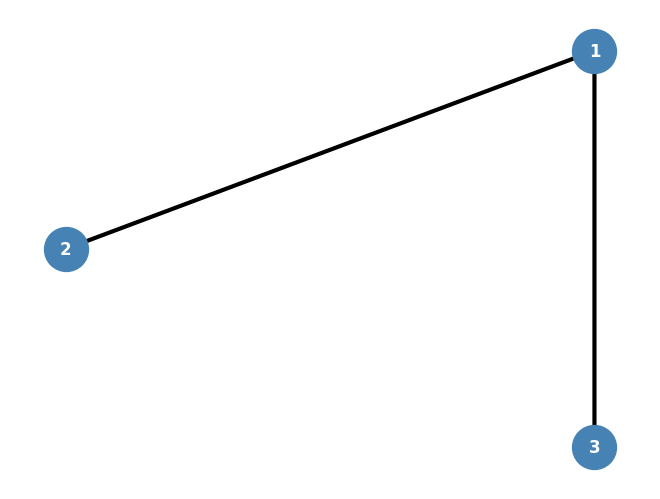

In [7]:
# Draw the Graph
import networkx as nx
G = nx.Graph()
#G.add_nodes_from(vertices)
#G.add_edges_from(edges)
G.add_nodes_from([2, 3])
G.add_edges_from([(1, 2), (1, 3)])

options = {
    'node_color': 'steelblue',
    "font_color": "white",
    'node_size': 1000,
    'width': 3,
    'font_weight': 'bold'
}

nx.draw_shell(G, with_labels=True, **options)